# Assignment 1
### Exercise 2

a) What is the information you can obtain from the data set/data sets?  

b) What are the attributes in the data and what is their meaning?  

c) Write a small parsing function that can read the data position (column, row) from the file format you selected.  

d) Write another function that outputs the distribution of the attributes, and counts the frequencies of the different values.  

e) Try to describe the data set in just few sentences! How is the data provided? Which kind of attributes are contained in the dataset? How large is the dataset in terms of the number of those elements (person, vehicles, geographic regions and locations, extra records and so on)?  

f) Analyze the errors and missing values. Write a function to count how many missing values per attribute and per entry you have. Analyze what are the most relevant missing values that might hinder the analysis according to you?

In [1]:
#import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#columns of the 2015 dataset
df = pd.read_csv("dataset_2015.csv")
print(df.columns)

/Users/lievegobbels/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,1,2,3,4,18,21,22,23,26,27,28,30,35,36,37,39,40,41,42,43,48,49,50,51,52,53,54,55,56,57,58,59) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Vehicle_Reference_df_res',
       'Casualty_Reference', 'Casualty_Class', 'Sex_of_Casualty',
       'Age_of_Casualty', 'Age_Band_of_Casualty', 'Casualty_Severity',
       'Pedestrian_Location', 'Pedestrian_

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363206 entries, 0 to 363205
Data columns (total 67 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Accident_Index                               363206 non-null  object
 1   Location_Easting_OSGR                        363206 non-null  object
 2   Location_Northing_OSGR                       363206 non-null  object
 3   Longitude                                    363206 non-null  object
 4   Latitude                                     363206 non-null  object
 5   Police_Force                                 363206 non-null  int64 
 6   Accident_Severity                            363206 non-null  int64 
 7   Number_of_Vehicles                           363206 non-null  int64 
 8   Number_of_Casualties                         363206 non-null  int64 
 9   Date                                         363206 non-null  object
 

In [4]:
df.describe()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Urban_or_Rural_Area,Vehicle_Reference_df_res,Casualty_Reference,Casualty_Class,Casualty_Severity,Casualty_Type,Vehicle_Reference_df,Sex_of_Driver
count,363206.000000,363206.000000,363206.000000,363206.000000,363206.000000,363206.000000,363206.000000,363206.000000,363206.000000,363206.000000,363206.000000,363206.000000,363206.000000,363206.000000,363206.000000,363206.000000,363206.000000,363206.000000,363206.000000,363206.000000
mean,30.236516,2.817308,2.392075,2.099745,4.110106,348.783737,3.915613,960.643497,5.084718,40.343854,1.926460,1.505385,1.393543,1.680504,1.564960,1.380376,2.875729,7.840201,1.696205,1.397612
std,24.560908,0.432795,2.335356,2.755896,1.934558,251.704852,1.470990,1774.055443,1.654010,14.999856,1.641218,1.495726,0.488536,1.263794,1.693258,0.615253,0.355194,7.366704,1.487146,0.590486
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,7.000000,3.000000,2.000000,1.000000,2.000000,129.000000,3.000000,1.000000,3.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000,1.000000,1.000000
50%,31.000000,3.000000,2.000000,1.000000,4.000000,327.000000,3.000000,112.000000,6.000000,30.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,9.000000,1.000000,1.000000
75%,45.000000,3.000000,2.000000,2.000000,6.000000,517.000000,6.000000,666.000000,6.000000,60.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,9.000000,2.000000,2.000000
max,98.000000,3.000000,37.000000,38.000000,7.000000,941.000000,6.000000,9914.000000,9.000000,70.000000,7.000000,9.000000,2.000000,32.000000,38.000000,3.000000,3.000000,98.000000,37.000000,3.000000


In [5]:
df.head(5)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_Home_Area_Type
0,201501BS70001,525130,180050,-0.198465,51.505538,1,3,1,1,12/01/2015,...,1,1,1,1,?,?,2143,2,4,?
1,201501BS70002,526530,178560,-0.178838,51.491836,1,3,1,1,12/01/2015,...,1,1,6,1,?,?,1600,1,3,?
2,201501BS70004,524610,181080,-0.20559,51.51491,1,3,1,1,12/01/2015,...,1,1,6,1,30,6,1686,2,10,1
3,201501BS70005,524420,181080,-0.208327,51.514952,1,3,1,1,13/01/2015,...,1,1,6,1,?,?,?,?,?,?
4,201501BS70008,524630,179040,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,1,2,1,48,8,?,?,?,1


In [6]:
#count unique values per column

df_attr_freq = pd.DataFrame([])


for column in df:
    attr_freq = df[column].value_counts(dropna=False)
    df_attr_freq = pd.concat([df_attr_freq, attr_freq.to_frame()], axis=0, join='outer')
    #same as df.append()
    
#df_attr_freq



In [7]:
df_attr_freq.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_Home_Area_Type
201543P296025,1332.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015460257544,224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015621500156,175.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015471503836,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201597AC70404,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_attr_freq.index.name = 'Unique value'


In [9]:
df_attr_freq.loc['?'].head(5)
df_attr_2 = df_attr_freq.loc['?'].groupby('Unique value', axis=0, squeeze=True).sum()
df_attr_2

<ipython-input-9-7a77fc7b0149>:2: FutureWarning: The `squeeze` parameter is deprecated and will be removed in a future version.
  df_attr_2 = df_attr_freq.loc['?'].groupby('Unique value', axis=0, squeeze=True).sum()


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_Home_Area_Type
Unique value,,,,,,,,,,,,,,,,,,,,,
?,0.0,73.0,73.0,73.0,73.0,0.0,0.0,0.0,0.0,0.0,...,206.0,1483.0,21.0,0.0,35868.0,35868.0,93341.0,92631.0,107099.0,60699.0


# Explorational plots

In [10]:
#import the 2020 data set
data_2020 = pd.read_csv("dataset_2020.csv")

/Users/lievegobbels/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,3,25,36,38,40,41,60,75,76) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
data_2020.head(3)

,Unnamed: 0,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,accident_ref_no,vehicle_text
0,0,2020010219808,2020,10219808,1.0,9.0,9.0,5.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020010220496,2020,10220496,1.0,9.0,0.0,4.0,2.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020010228005,2020,10228005,1.0,9.0,0.0,18.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#all 66 (67 with 'unnamed') columns
data_2020.columns

Index(['Unnamed: 0', 'accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type', 'location_easting_osgr',
       'location_northing_osgr', 'longitude', 'latitude', 'police_force',
       'accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'date', 'day_of_week', 'time', 'local_authority_district',
       'local_authority_ons_district', 

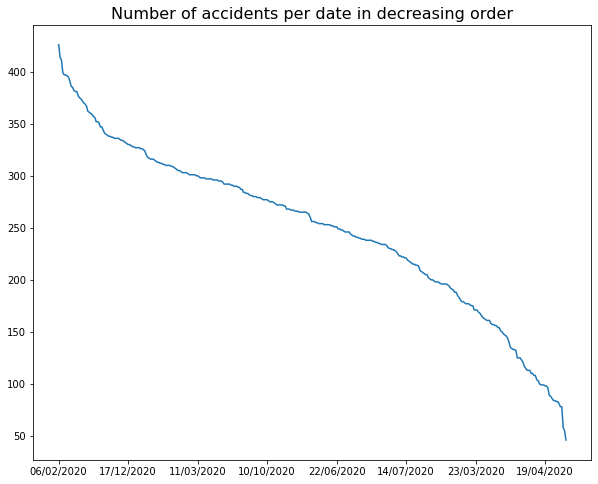

In [13]:
#number of accidents per date in decreasing order; not very informative
ax = data_2020['date'].value_counts(dropna=True).plot(figsize=(10,8))
ax.set_title('Number of accidents per date in decreasing order', size=16);

In [14]:
data_2020 = data_2020.sort_values("date")
data_2020['date']

238033    01/01/2020
244318    01/01/2020
244287    01/01/2020
203109    01/01/2020
250815    01/01/2020
             ...    
374614           NaN
374615           NaN
374616           NaN
374617           NaN
374618           NaN
Name: date, Length: 374619, dtype: object

In [15]:
#proportion accidents per date
data_2020['date']
pr_accidents_date = data_2020['date'].value_counts(sort=False, normalize=True, dropna=True)
pr_accidents_date = pr_accidents_date.to_frame()
pr_accidents_date = pr_accidents_date.sort_index()
pr_accidents_date



,date
01/01/2020,0.002149
01/02/2020,0.003169
01/03/2020,0.002599
01/04/2020,0.000855
01/05/2020,0.001711
...,...
31/05/2020,0.002621
31/07/2020,0.004134
31/08/2020,0.002643
31/10/2020,0.003202


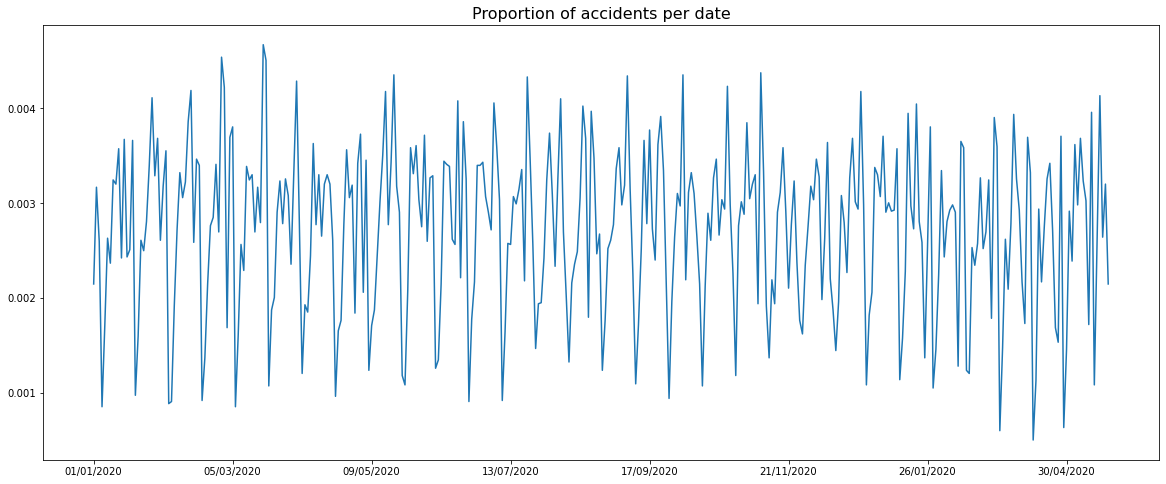

In [16]:
ax = pr_accidents_date['date'].plot(figsize=(20,8))
ax.set_title('Proportion of accidents per date', size=16);

In [17]:
#number of accidents per date
data_2020['date']
nr_accidents_date = data_2020['date'].value_counts(sort=False, normalize=False, dropna=True)
nr_accidents_date = nr_accidents_date.to_frame()
nr_accidents_date = nr_accidents_date.sort_index()
nr_accidents_date

,date
01/01/2020,196
01/02/2020,289
01/03/2020,237
01/04/2020,78
01/05/2020,156
...,...
31/05/2020,239
31/07/2020,377
31/08/2020,241
31/10/2020,292


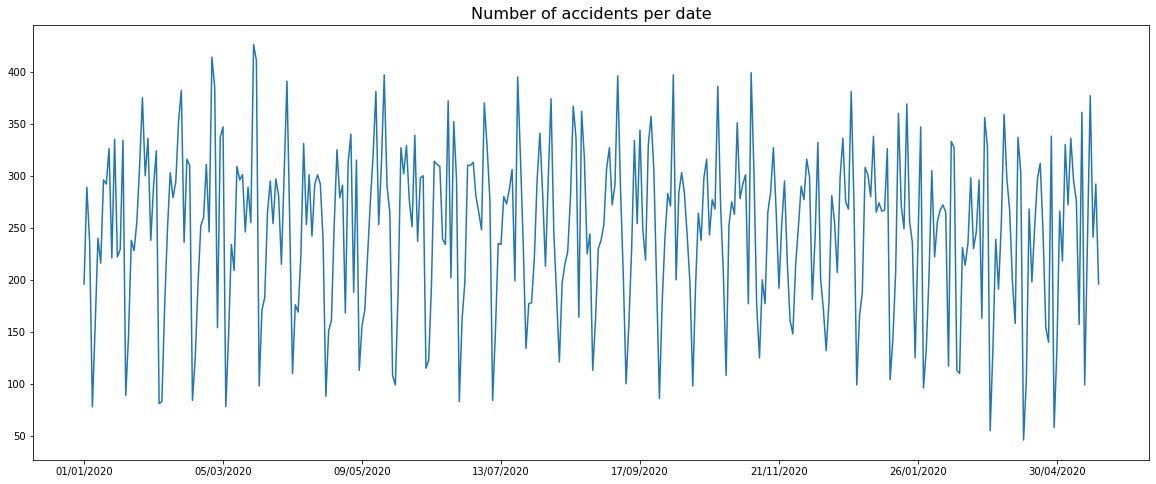

In [18]:
ax = nr_accidents_date['date'].plot(figsize=(20,8))
ax.set_title('Number of accidents per date', size=16);

In [19]:
#since the plots took too long to run for the entire dataset when using str categories instead of the numbers,
#I made a df that only contains the first 10000 entries (without str categories)

data_part1 = data_2020.head(10000)

In [20]:
# categorize accident_severity (fatal, serious, slight) from num to str

#note: comment this when the below plots take too long to run
data_2020.loc[data_2020['accident_severity']== 1, "accident_severity"] = 'fatal'
data_2020.loc[data_2020['accident_severity']==2, "accident_severity"] = 'serious'
data_2020.loc[data_2020['accident_severity']==3, "accident_severity"] = 'slight'
data_2020['accident_severity'].value_counts()

slight     71453
serious    18355
fatal       1391
Name: accident_severity, dtype: int64

In [21]:
#categorize road_surface_conditions (dry, wet, snow, frost, ice or flood) from num to str

#note: comment this when the below plots take too long to run
data_2020.loc[data_2020['road_surface_conditions']==1, 'road_surface_conditions'] = 'dry'
data_2020.loc[data_2020['road_surface_conditions']==2, 'road_surface_conditions'] = 'wet/damp'
data_2020.loc[data_2020['road_surface_conditions']==3, 'road_surface_conditions'] = 'snow'
data_2020.loc[data_2020['road_surface_conditions']==4, 'road_surface_conditions'] = 'frost/ice'
data_2020.loc[data_2020['road_surface_conditions']==5, 'road_surface_conditions'] = 'flood'

In [22]:
#since the plots took too long to run for the entire dataset when using str categories instead of the numbers,
#I made a df that only contains the first 10000 entries (with str categories)
data_part = data_2020.head(10000)

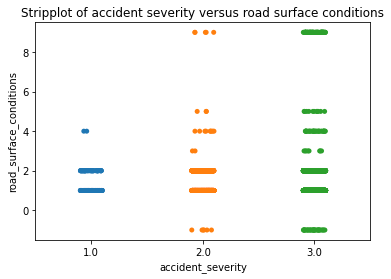

In [25]:
#stripplot road surface conditions vs. accident severity
ax = sns.stripplot(data=data_part1, x='accident_severity', y='road_surface_conditions')
ax.set_title("Stripplot of accident severity versus road surface conditions");


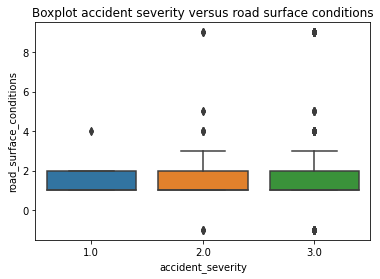

In [26]:
#boxplot road surface conditions vs. accident severity
ax = sns.boxplot(data=data_part1, x='accident_severity', y='road_surface_conditions')
ax.set_title("Boxplot accident severity versus road surface conditions");

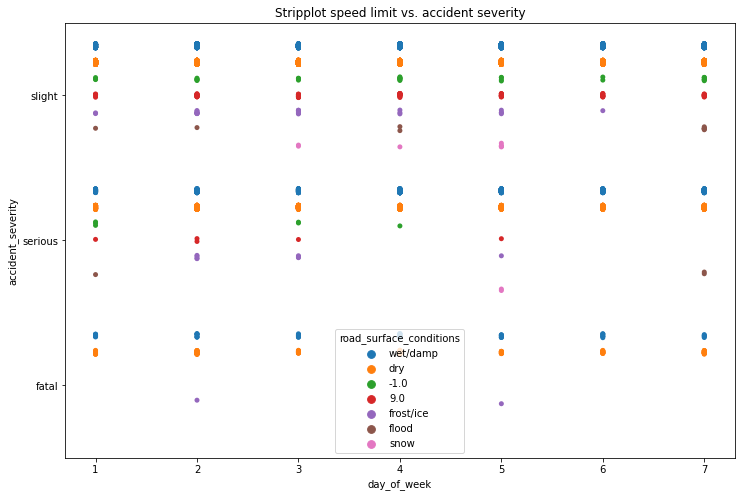

In [27]:
#speed limit vs accident severity: I have no idea what -1.0 and 9.0 are but they are present in the data set
#according to the description on the government website and the police form there are only 5 categories as initialized before

plt.figure(figsize=(12,8))
sns.stripplot( data=data_part, x='day_of_week', y='accident_severity', hue='road_surface_conditions',
                  size=12, s=5, jitter=True, dodge=True)
plt.title("Stripplot speed limit vs. accident severity");





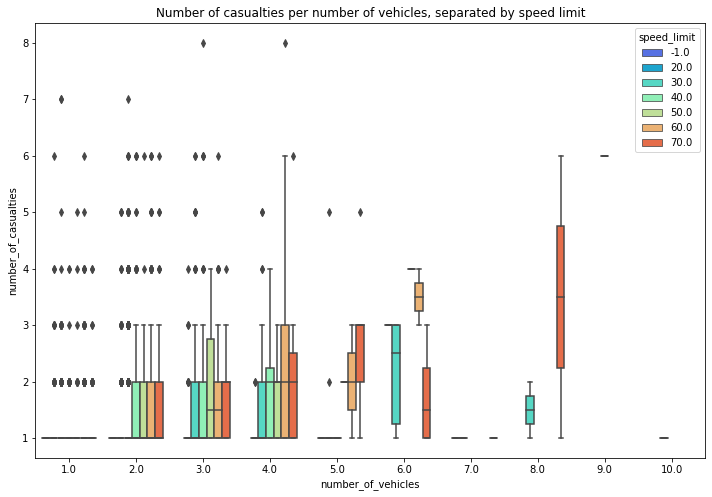

In [28]:
#boxplot of the number of vehicles vs. number of casualties, categorized by speed limit
plt.figure(figsize=(12,8))
sns.boxplot(x='number_of_vehicles',y='number_of_casualties',data=data_part, hue='speed_limit', palette='rainbow')
plt.title("Number of casualties per number of vehicles, separated by speed limit");

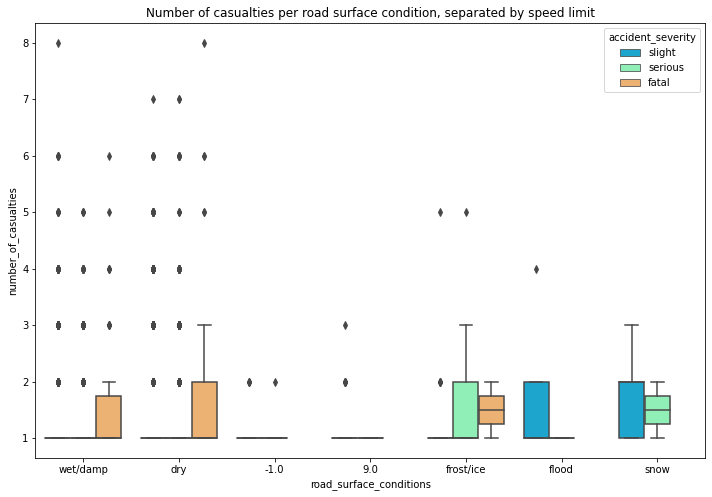

In [29]:
#boxplot of the road surface conditions vs. the number of casualties
plt.figure(figsize=(12,8))
sns.boxplot(x='road_surface_conditions',y='number_of_casualties',data=data_part, hue='accident_severity', palette='rainbow')
plt.title("Number of casualties per road surface condition, separated by speed limit");

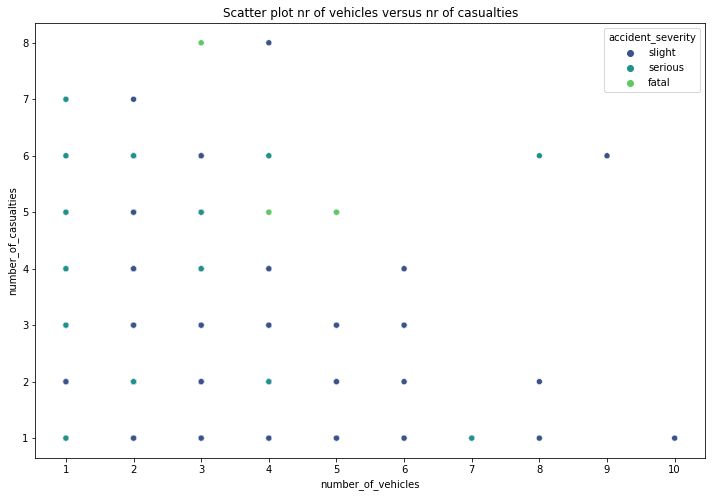

In [30]:
#scatterplot number of vehicles vs. number of casualties
plt.figure(figsize=(12,8))
sns.scatterplot(x='number_of_vehicles',y='number_of_casualties',data=data_part, hue='accident_severity', palette='viridis')
plt.locator_params(axis='x', nbins=10)
plt.title("Scatter plot nr of vehicles versus nr of casualties");

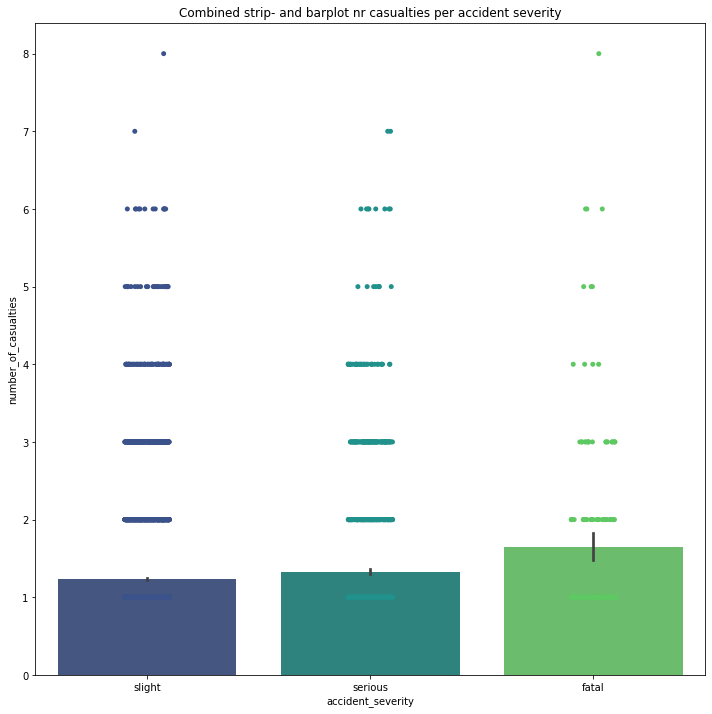

In [31]:
#combined strip- and barplot nr casualties per accident severity
plt.figure(figsize=(12,12))
sns.stripplot(x='accident_severity',y='number_of_casualties',data=data_part, palette='viridis',
              jitter=True, dodge=True)
sns.barplot(x='accident_severity',y='number_of_casualties',data=data_part, palette='viridis')
plt.title("Combined strip- and barplot nr casualties per accident severity");

In [32]:
data_2020.loc[data_2020['road_type']== 1, "road_type"] = 'roundabout'
data_2020.loc[data_2020['road_type']== 2, "road_type"] = 'one way street'
data_2020.loc[data_2020['road_type']== 3, "road_type"] = 'dual carriageway'
data_2020.loc[data_2020['road_type']== 6, "road_type"] = 'single carriageway'
data_2020.loc[data_2020['road_type']== 7, "road_type"] = 'slip road'
data_2020.loc[data_2020['road_type']== 9, "road_type"] = 'unknown'



In [33]:
data_2020.loc[data_2020['junction_control']==1, 'junction_control'] = 'authorised person'
data_2020.loc[data_2020['junction_control']==2, 'junction_control'] = 'automatic traffic signal'
data_2020.loc[data_2020['junction_control']==3, 'junction_control'] = 'stop sign'
data_2020.loc[data_2020['junction_control']==4, 'junction_control'] = 'give way or uncontrolled'



In [34]:
#repetition of previous code line to update the data_part df :)
data_part = data_2020.head(10000)

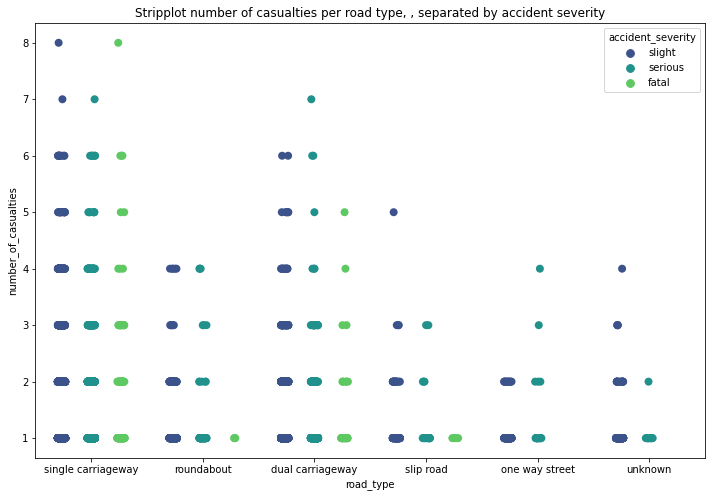

In [35]:
#stripplot number of casualties per road type, separated by acc. severity
plt.figure(figsize=(12,8))
sns.stripplot(x='road_type',y='number_of_casualties', hue='accident_severity',data=data_part, palette='viridis',
              jitter=True, dodge=True, s=8)
plt.title("Stripplot number of casualties per road type, , separated by accident severity");

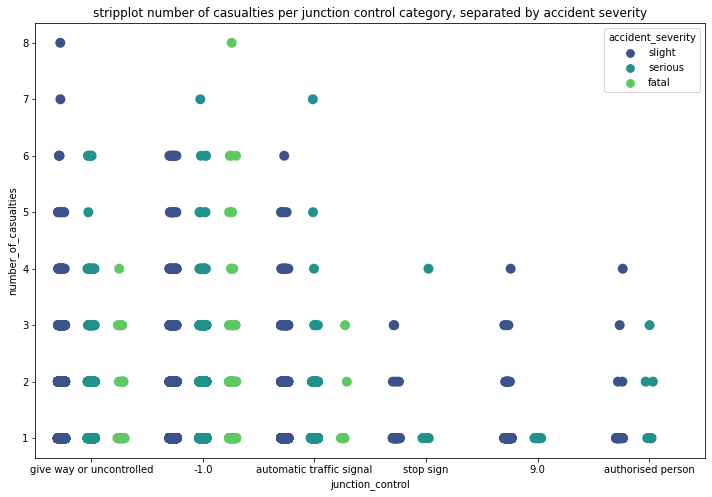

In [36]:
#stripplot number of casualties per junction control category, separated by acc. severity
plt.figure(figsize=(12,8))
sns.stripplot(x='junction_control',y='number_of_casualties', hue='accident_severity',data=data_part, palette='viridis',
              jitter=True, dodge=True, s=10)
plt.title("stripplot number of casualties per junction control category, separated by accident severity");

In [37]:
#some extra info, because the -1 and 9 showed up again
data_2020['junction_control'].value_counts()

give way or uncontrolled    39998
-1.0                        38298
automatic traffic signal    10407
9.0                          1536
stop sign                     583
authorised person             377
Name: junction_control, dtype: int64